# **종합실습1 이변량분석(y-숫자) : car seat 매출 분석**

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## **1.환경준비**

### **(1) 라이브러리 로딩**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### **(2) 데이터 로딩**

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [2]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [3]:
target = 'Sales'

## **2.숫자형 X --> Y**

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

### **(1) Advertising -> Sales**

1) 시각화 : scatter(regplot), jointplot

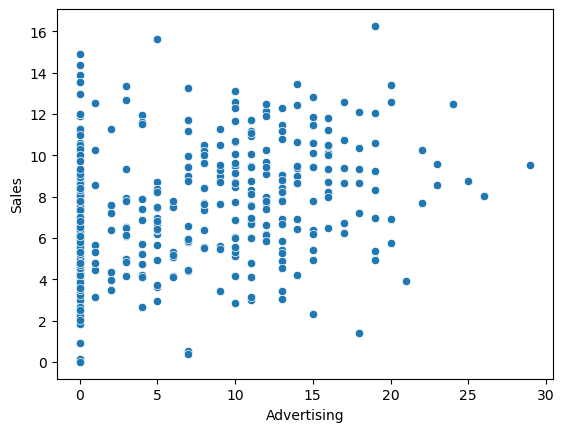

In [4]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

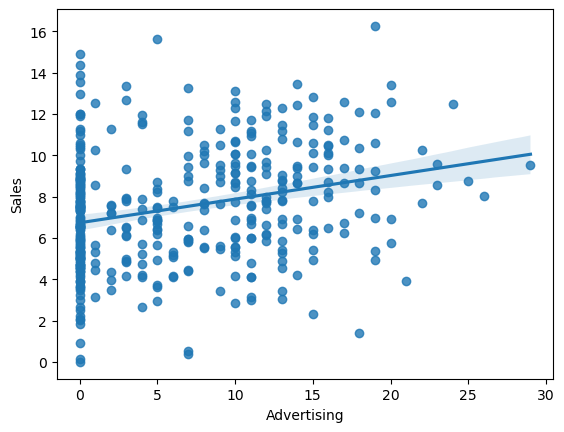

In [5]:
sns.regplot(x=var, y = target, data = data)
plt.show()

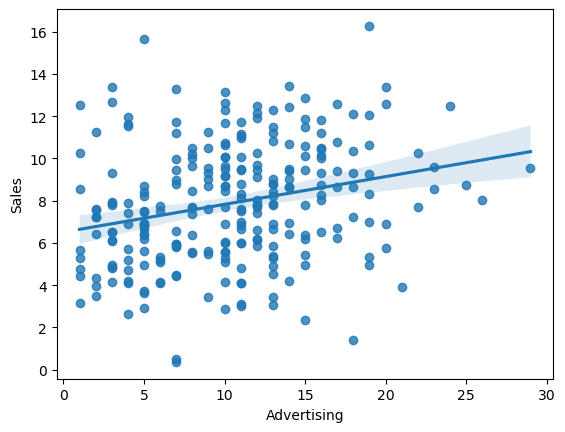

PearsonRResult(statistic=0.2571829256169392, pvalue=3.112672883086058e-05)

In [11]:
# 광고비가 0인경우 제외해볼까?
temp = data[data['Advertising']!=0]
sns.regplot(x='Advertising', y= 'Sales', data= temp)
plt.show()

spst.pearsonr(temp['Advertising'], temp['Sales'])

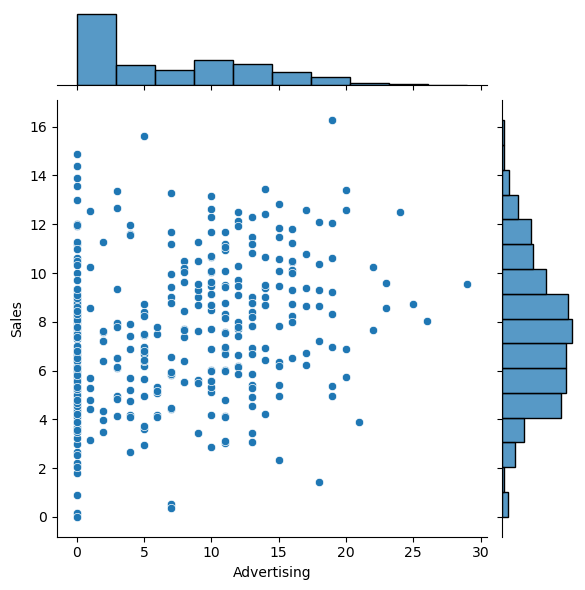

In [6]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [10]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.3776771103027514e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 광고비와 판매량은 관련이 있다. 그러나 크지 않다.

* 추가 : 광고비 0 빼고 분석해보기

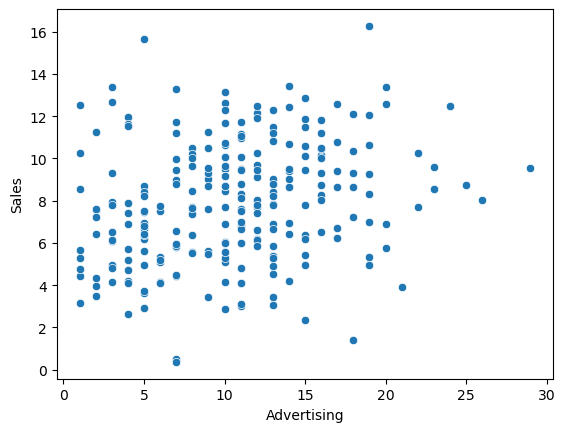

In [12]:
temp = data.loc[data['Advertising'] > 0]
sns.scatterplot(x=var, y = target, data = temp)
plt.show()

In [13]:
result = spst.pearsonr(temp[var], temp[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.2571829256169392, p-value : 3.112672883086058e-05


### **(2) Population -> Sales**

1) 시각화 : scatter(regplot), jointplot

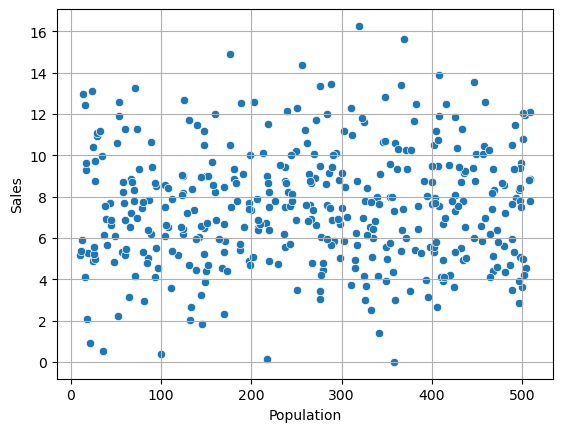

상관계수 : 0.0504709844720392, p-value : 0.31398160931904856


In [29]:
var='Population'
target='Sales'
eda_2_nn(var, target, data)

* 인구수에 판매량과 상관이 없네?
* 구매 가능한 인구수를 봐야한다! 20대 후반부터~

In [ ]:
# 추가 분석
over25 = data[data['Age'] >=25]

sns.scatterplot(x='Population',)

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(3) Price -> Sales**

1) 시각화 : scatter(regplot), jointplot

In [16]:
def eda_2_nn(var, target, data):
    sns.scatterplot(x=var, y=target, data=data)
    plt.grid()
    plt.show()
    result = spst.pearsonr(data[var], data[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')

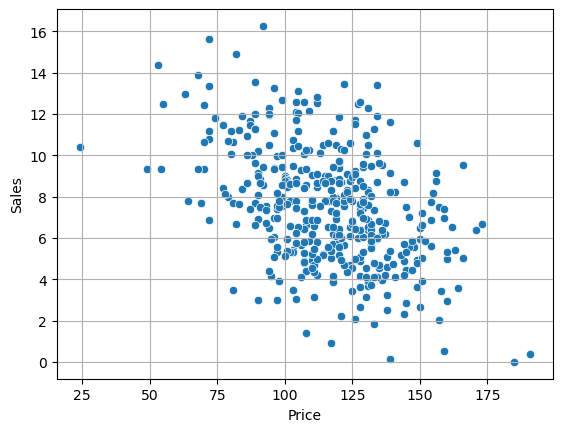

상관계수 : -0.4449507278465726, p-value : 7.618187011913169e-21


In [17]:
# 지역별 판매가격
var = 'Price'
target='Sales'
eda_2_nn(var, target, data)

* 산점도로 볼 때, 약간의 음의 상관관계를 볼 수 있다

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

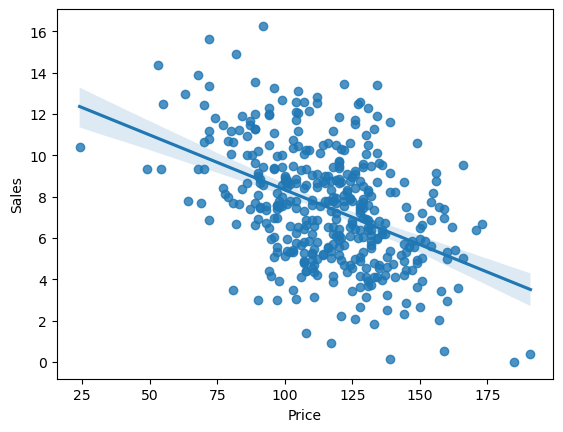

In [19]:
sns.regplot(x=var, y=target, data=data)
plt.show()

* 음의 상관관계를 보이며, 가격이 높을수록 판매량이 줄어드는 것을 확인할 수 있다

### **(4) Age -> Sales**

1) 시각화 : scatter(regplot), jointplot

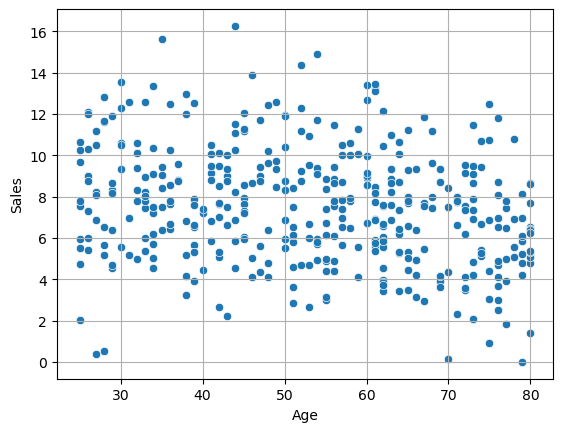

상관계수 : -0.2318154396045765, p-value : 2.7889498393714038e-06


In [22]:
eda_2_nn('Age','Sales',data=data)

* 나이를 평규냈네...
* 평균의 함정 -> 10대와 80대 평균과 30~40대 평균은 같다.
* 정확히 나이대별 인구수가 필요하다.

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(5) CompPrice -> Sales**

1) 시각화 : scatter(regplot), jointplot

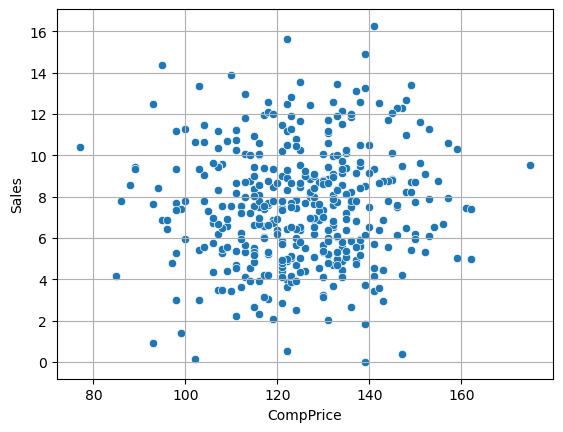

상관계수 : 0.06407872955062152, p-value : 0.2009398289418404


In [23]:
eda_2_nn('CompPrice','Sales',data=data)

* 상관계수 낮고, p-value 가 0.05 보다 크다.. 관련이 없네..?
* 경쟁사 가격이 왜 영향을 안 미치지?
* 자사 가격대비 경쟁사 가격 비율 또는 차이를 비교해봐야지! -> 가격 경쟁률을 봐야지!

추가 분석)

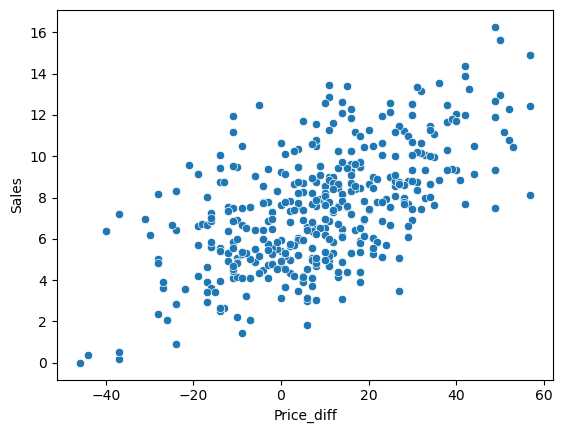

PearsonRResult(statistic=0.5979217124533921, pvalue=3.877120641788767e-40)

In [28]:
data['Price_diff'] = data['CompPrice'] - data['Price']

# 산점도와 피어슨 상관계수 확인
sns.scatterplot(x='Price_diff', y='Sales', data=data)
plt.show()

spst.pearsonr(data['Price_diff'], data['Sales'])

*

### **(6) Income -> Sales**

1) 시각화 : scatter(regplot), jointplot

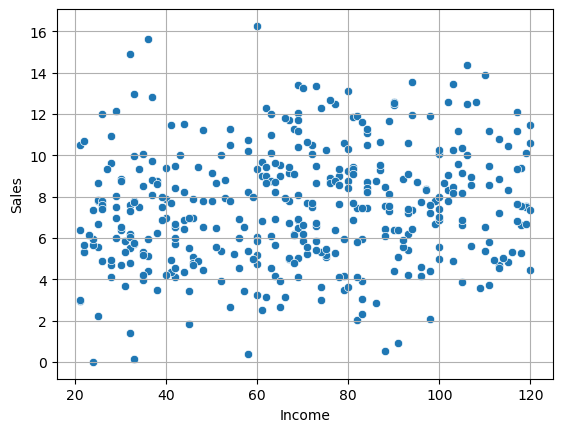

상관계수 : 0.15195097946754424, p-value : 0.0023096704539517904


In [20]:
# 지역의 구매력이 판매량 차이를 만들것이다.
var='Income'
target='Sales'
eda_2_nn(var, target, data)

* 구매력이 높을 수록 판매량이 약소하게 증가하지만, 상관성이 크진 않다
* 왜지? 왜 구매력이 sales에 영향이 크지 않지?
* 진짜 구매력은 지역평균소득*인구 일 것이다..

2) 수치화 : 상관분석

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

## **3.범주형 X --> Y**

* 모든 범주형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### **(1) ShelveLoc-> Sales**

1) 시각화 : 평균비교 barplot

In [ ]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [ ]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(2) Urban -> Sales**

1) 시각화 : 평균비교 barplot

<Axes: xlabel='Urban', ylabel='Sales'>

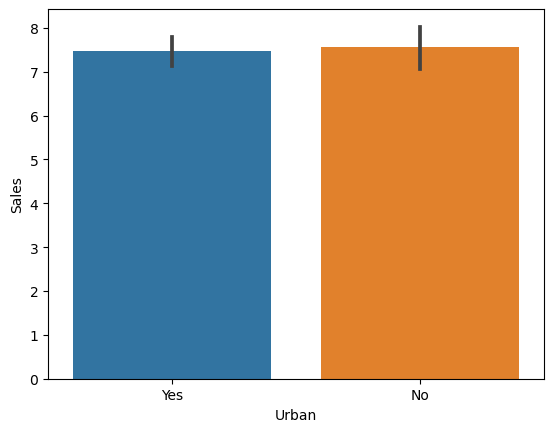

In [32]:
sns.barplot(x='Urban', y='Sales', data= data)

2) 수치화 : t-test, anova

In [33]:
d_y = data.loc[data['Urban']=='Yes', 'Sales']
d_n = data.loc[data['Urban']=='No', 'Sales']
spst.ttest_ind(d_y, d_n)

TtestResult(statistic=-0.30765346670661126, pvalue=0.7585069603942775, df=398.0)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(3) US-> Sales**

1) 시각화 : 평균비교 barplot

2) 수치화 : t-test, anova

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

## **4.관계 정리하기**

① 강한관계

In [ ]:
# Price_diff

② 중간관계

In [ ]:
# Advertising, Price, Age, Income

③ 관계없음

In [ ]:
# Population, CompPrice